# **Importing**

In [ ]:
pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import rarfile
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# **The First two Datasets**



> **DF1**






In [ ]:
DF1 = pd.read_csv('fuel pricing.csv')
DF1['Date'] = pd.to_datetime(DF1['Date'])
display(DF1)

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
...,...,...,...
8185,45,2013-06-28,3.639
8186,45,2013-07-05,3.614
8187,45,2013-07-12,3.614
8188,45,2013-07-19,3.737


In [ ]:
print(DF1.isna().sum())
print(DF1.duplicated().sum())

Store         0
Date          0
Fuel_Price    0
dtype: int64
0




> DF2



In [ ]:
DF2 = pd.read_csv('weather.csv')
DF2['Date'] = pd.to_datetime(DF2['Date'])
display(DF2)

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
...,...,...,...
8185,45,2013-06-28,76.05
8186,45,2013-07-05,77.50
8187,45,2013-07-12,79.37
8188,45,2013-07-19,82.84


In [ ]:
print(DF2.isna().sum())
print(DF2.duplicated().sum())

Store          0
Date           0
Temperature    0
dtype: int64
0


# **Merging DF1 & DF2**

In [ ]:
df = pd.merge(DF1, DF2, on=['Date', 'Store'])
display(df)

,Store,Date,Fuel_Price,Temperature
0,1,2010-02-05,2.572,42.31
1,1,2010-02-12,2.548,38.51
2,1,2010-02-19,2.514,39.93
3,1,2010-02-26,2.561,46.63
4,1,2010-03-05,2.625,46.50
...,...,...,...,...
8185,45,2013-06-28,3.639,76.05
8186,45,2013-07-05,3.614,77.50
8187,45,2013-07-12,3.614,79.37
8188,45,2013-07-19,3.737,82.84


In [ ]:
print(df.isna().sum())
print(df.duplicated().sum())

Store          0
Date           0
Fuel_Price     0
Temperature    0
dtype: int64
0


# **The Third Dataset**

In [ ]:
with rarfile.RarFile('data.rar') as rf:
    Data = rf.extract('data.csv')
DF3 = pd.read_csv(Data)
DF3['Date'] = pd.to_datetime(DF3['Date'])
display(DF3)

nan3 = DF3.isna().sum()
display(nan3)

dup3 = DF3.duplicated().sum()
display(dup3)

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
dtype: int64

0

# **The Merged Dataset**

In [ ]:
DF = pd.merge(DF3, df, on=['Date', 'Store'], how='inner')
display(DF)

,Store,Category,Date,Weekly_Sales,Holiday,Fuel_Price,Temperature
0,1,1,2010-02-05,24924.50,False,2.572,42.31
1,1,2,2010-02-05,50605.27,False,2.572,42.31
2,1,3,2010-02-05,13740.12,False,2.572,42.31
3,1,4,2010-02-05,39954.04,False,2.572,42.31
4,1,5,2010-02-05,32229.38,False,2.572,42.31
...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,3.882,58.85
421566,45,94,2012-10-26,5203.31,False,3.882,58.85
421567,45,95,2012-10-26,56017.47,False,3.882,58.85
421568,45,97,2012-10-26,6817.48,False,3.882,58.85


# **Data Cleaning**

In [ ]:
display(DF.isna().sum())

display(DF.duplicated().sum())

Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
Fuel_Price      0
Temperature     0
dtype: int64

0



> **Sorting the dataframe**



In [ ]:
#It doesn't make sense that alot of categories have the same price in the same store at the same date

#DF = pd.DataFrame(DF.drop_duplicates())
DF.sort_values(by=['Store','Category','Date'], inplace=True)
DF

,Store,Category,Date,Weekly_Sales,Holiday,Fuel_Price,Temperature
0,1,1,2010-02-05,24924.50,False,2.572,42.31
73,1,1,2010-02-12,46039.49,True,2.548,38.51
145,1,1,2010-02-19,41595.55,False,2.514,39.93
218,1,1,2010-02-26,19403.54,False,2.561,46.63
290,1,1,2010-03-05,21827.90,False,2.625,46.50
...,...,...,...,...,...,...,...
421302,45,98,2012-09-28,508.37,False,3.997,64.88
421370,45,98,2012-10-05,628.10,False,3.985,64.89
421436,45,98,2012-10-12,1061.02,False,4.000,54.47
421502,45,98,2012-10-19,760.01,False,3.969,56.47


###Checking for incorrect data



In [ ]:
#Weekly sales and fuel price can't be negative values or equal to zero

DF.loc[(DF.Weekly_Sales<=0) | (DF.Fuel_Price<=0)]

,Store,Category,Date,Weekly_Sales,Holiday,Fuel_Price,Temperature
9385,1,6,2012-08-10,-139.65,False,3.494,85.05
8403,1,18,2012-05-04,-1.27,False,3.749,75.55
188,1,47,2010-02-19,-863.00,False,2.514,39.93
406,1,47,2010-03-12,-698.00,False,2.667,57.79
2549,1,47,2010-10-08,-58.00,False,2.633,63.93
...,...,...,...,...,...,...,...
412054,45,80,2010-02-12,-0.43,True,2.773,27.73
412123,45,80,2010-02-19,-0.27,False,2.745,31.27
412663,45,80,2010-04-16,-1.61,False,2.899,54.28
413401,45,80,2010-07-02,-0.27,False,2.815,76.61


In [ ]:
DF = DF.drop(DF.loc[(DF.Weekly_Sales<=0) | (DF.Fuel_Price<=0)].index)
DF.loc[(DF.Weekly_Sales<=0) | (DF.Fuel_Price<=0)]

,Store,Category,Date,Weekly_Sales,Holiday,Fuel_Price,Temperature


In [ ]:
#Does it make sense that temperature can be more than 57.8 Cel.... or is it in Fehrenhite?

#DF.loc[(DF.Temperature>57.8) | (DF.Temperature<-128.6)]



###**Outliers**



Outliers of Weekly Sales

In [ ]:
#Outliers of Weekly Sales
col = DF['Weekly_Sales']

# calculate the z-scores for the column values
z_scores = np.abs((col - col.mean()) / col.std())

# set the threshold for outliers (e.g. 3 standard deviations from the mean)
threshold = 20

sales_outliers = col[z_scores > threshold]

sales_outliers

90645     693099.36
94393     630999.19
131088    474330.10
333594    627962.93
337053    649770.18
Name: Weekly_Sales, dtype: float64

In [ ]:
#Outliers of Weekly Sales
col = DF['Weekly_Sales']

# calculate the z-scores for the column values
z_scores = np.abs((col - col.mean()) / col.std())

# set the threshold for outliers (e.g. 3 standard deviations from the mean)
threshold = 3

sales_outliers = col[z_scores > threshold]

display(z_scores)

sales_outliers.count()

0         0.391183
73        1.320152
145       1.124637
218       0.148284
290       0.254946
            ...   
421302    0.683022
421370    0.677754
421436    0.658708
421502    0.671951
421569    0.658014
Name: Weekly_Sales, Length: 420212, dtype: float64

8805

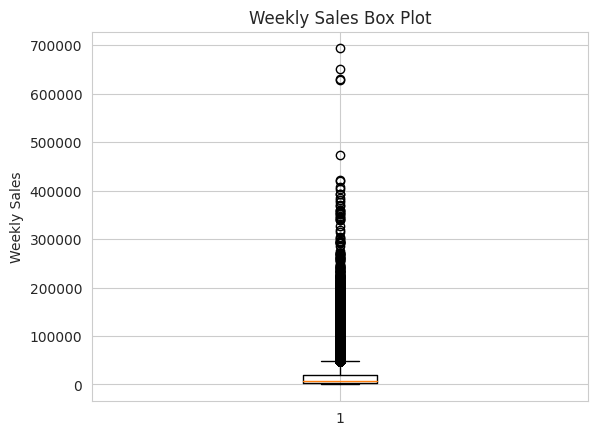

Maximum Range:  47497.84


In [ ]:
#Box Plot of Weekly Sales

# Create a box plot of the "Weekly_Sales" column
fig, ax = plt.subplots()
box = ax.boxplot(DF["Weekly_Sales"])

# Get the higher whisker value
max_range = box['whiskers'][1].get_ydata()[1]


# Set the title and axis labels
plt.title("Weekly Sales Box Plot")
plt.ylabel("Weekly Sales")

# Show the plot
plt.show()

# Print the maximum range
print("Maximum Range: ", max_range)

In [ ]:
#Getting extreme values that are over maximum range
DF['Weekly_Sales'].loc[DF.Weekly_Sales>max_range].count()

35377



> Replacing extreme values with mean or median



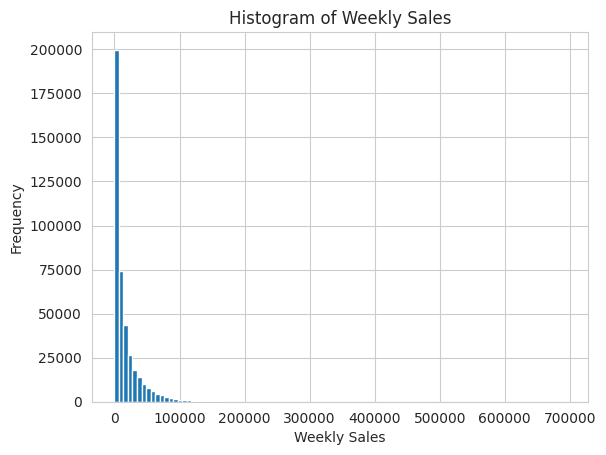

In [ ]:
#Making a histogram to check the distribution of the data

# Create a histogram with 10 bins
plt.hist(DF['Weekly_Sales'], bins=100)

# Add axis labels and a title
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Weekly Sales')

# Display the histogram
plt.show()

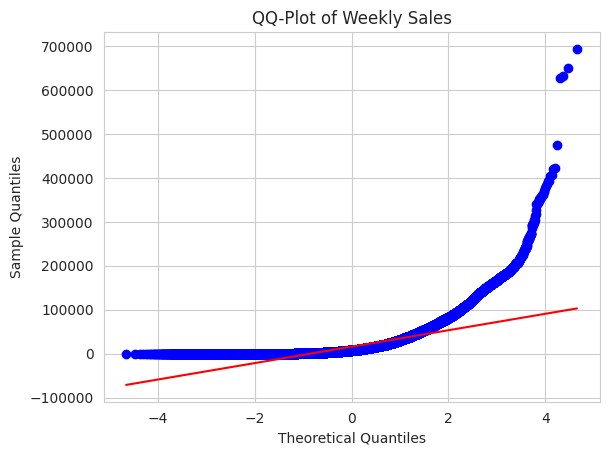

In [ ]:
from scipy.stats import probplot

# Extract the "Weekly_Sales" column from the dataframe
weekly_sales = DF['Weekly_Sales']

# Create a QQ-plot
probplot(weekly_sales, plot=plt)

# Add axis labels and a title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ-Plot of Weekly Sales')

# Display the plot
plt.show()

Outliers of Fuel Price

In [ ]:
#Outliers of Fuel Price
col = DF['Fuel_Price']

# calculate the z-scores for the column values
z_scores = np.abs((col - col.mean()) / col.std())

# set the threshold for outliers (e.g. 3 standard deviations from the mean)
threshold = 3

fuel_price_outliers = col[z_scores > threshold]

fuel_price_outliers.count()

0

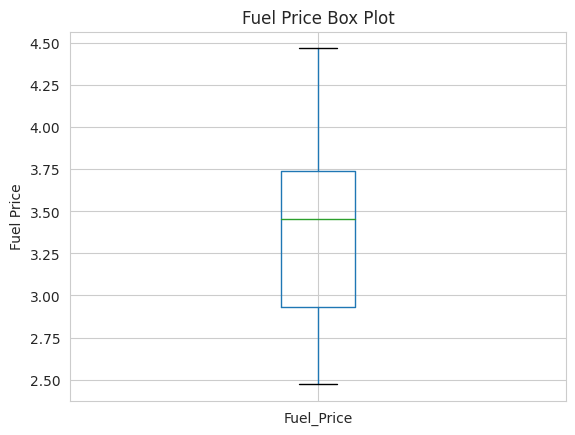

In [ ]:
#Box Plot of Fuel price before dropping outliers

DF.boxplot(column="Fuel_Price")

# Set the title and axis labels
plt.title("Fuel Price Box Plot")
plt.ylabel("Fuel Price")

# Show the plot
plt.show()

Outliers of Temperature

In [ ]:
col = DF['Temperature']

# calculate the z-scores for the column values
z_scores = np.abs((col - col.mean()) / col.std())

# set the threshold for outliers (e.g. 3 standard deviations from the mean)
threshold = 3

temperature_outliers = col[z_scores > threshold]

temperature_outliers.count()

67

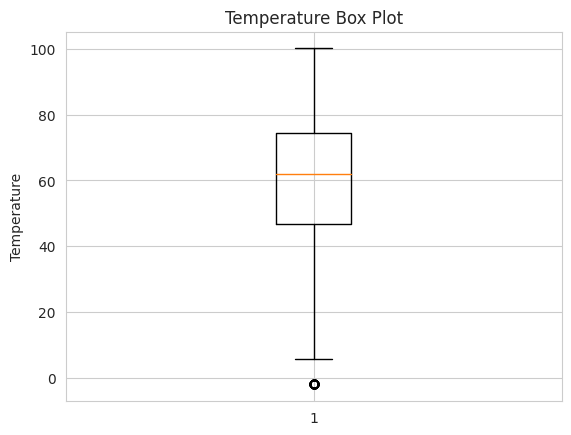

Minimum Range:  5.54


In [ ]:
#Box Plot of Temperature before dropping outliers

# Create a box plot of the "Weekly_Sales" column
fig, ax = plt.subplots()
box = ax.boxplot(DF["Temperature"])

# Get the whisker values
lower_whisker = box['whiskers'][0].get_ydata()[1]

# Get the minimum range
#min_range = max(whiskers) - min(whiskers)

# Set the title and axis labels
plt.title("Temperature Box Plot")
plt.ylabel("Temperature")

# Show the plot
plt.show()

# Print the minimum range
print("Minimum Range: ", lower_whisker)

In [ ]:
#Getting extreme values that are under minimum range
DF['Temperature'].loc[DF.Temperature<lower_whisker].count()

67

In [ ]:
#Dropping lower outliers

#DF.drop(DF['Temperature'].loc[DF.Temperature<lower_whisker] .index, inplace=True)

###**ReIndexing after cleaning**

In [ ]:
DF.reset_index(drop=True, inplace=True)
DF.index += 1
DF

,Store,Category,Date,Weekly_Sales,Holiday,Fuel_Price,Temperature
1,1,1,2010-02-05,24924.50,False,2.572,42.31
2,1,1,2010-02-12,46039.49,True,2.548,38.51
3,1,1,2010-02-19,41595.55,False,2.514,39.93
4,1,1,2010-02-26,19403.54,False,2.561,46.63
5,1,1,2010-03-05,21827.90,False,2.625,46.50
...,...,...,...,...,...,...,...
420208,45,98,2012-09-28,508.37,False,3.997,64.88
420209,45,98,2012-10-05,628.10,False,3.985,64.89
420210,45,98,2012-10-12,1061.02,False,4.000,54.47
420211,45,98,2012-10-19,760.01,False,3.969,56.47


# **Data Visualization**



> Describing and Sorting Data



In [ ]:
des = DF.describe()
display(des)
#display(DF['Date'].unique())

,Store,Category,Weekly_Sales,Fuel_Price,Temperature
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,3.360890,60.090599
std,12.787236,30.508819,22729.492116,0.458519,18.447857
min,1.000000,1.000000,0.010000,2.472000,-2.060000
25%,11.000000,18.000000,2120.130000,2.933000,46.680000
50%,22.000000,37.000000,7661.700000,3.452000,62.090000
75%,33.000000,74.000000,20271.265000,3.738000,74.280000
max,45.000000,99.000000,693099.360000,4.468000,100.140000


In [ ]:
#Making dataframe sorted by date and store

Data = DF.sort_values(by=['Date','Store'])
Data['Date'] = pd.to_datetime(Data['Date'])

#Indexing by Date
Data = Data.set_index('Date')

Data

,Store,Category,Weekly_Sales,Holiday,Fuel_Price,Temperature
Date,,,,,,
2010-02-05,1,1,24924.50,False,2.572,42.31
2010-02-05,1,2,50605.27,False,2.572,42.31
2010-02-05,1,3,13740.12,False,2.572,42.31
2010-02-05,1,4,39954.04,False,2.572,42.31
2010-02-05,1,5,32229.38,False,2.572,42.31
...,...,...,...,...,...,...
2012-10-26,45,93,2487.80,False,3.882,58.85
2012-10-26,45,94,5203.31,False,3.882,58.85
2012-10-26,45,95,56017.47,False,3.882,58.85



###**1- Line Chart of Weekly Sales over Time**



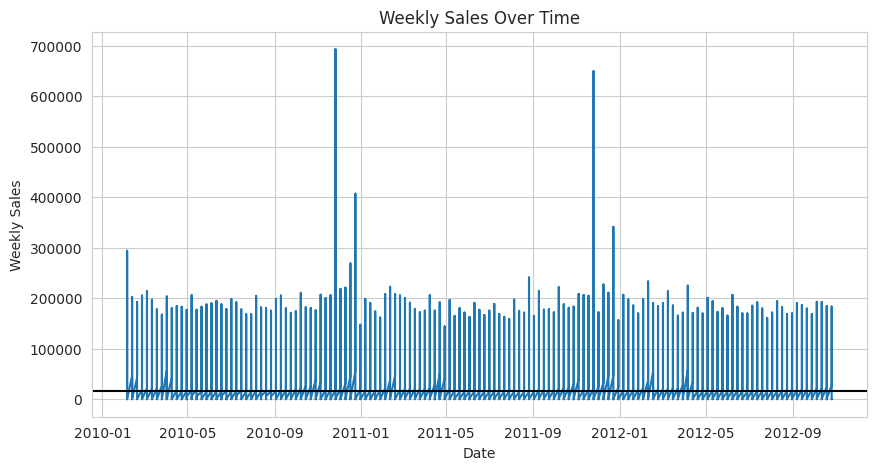

In [ ]:
# create a line chart of weekly sales over time
plt.figure(figsize=(10,5))
plt.plot(Data['Weekly_Sales'])

# set the chart title and axis labels
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

# add a horizontal line at the mean weekly sales
plt.axhline(y=Data['Weekly_Sales'].mean(), color='black')

# show the chart
plt.show()



###**2- Bar Chart of How much each brand sells**



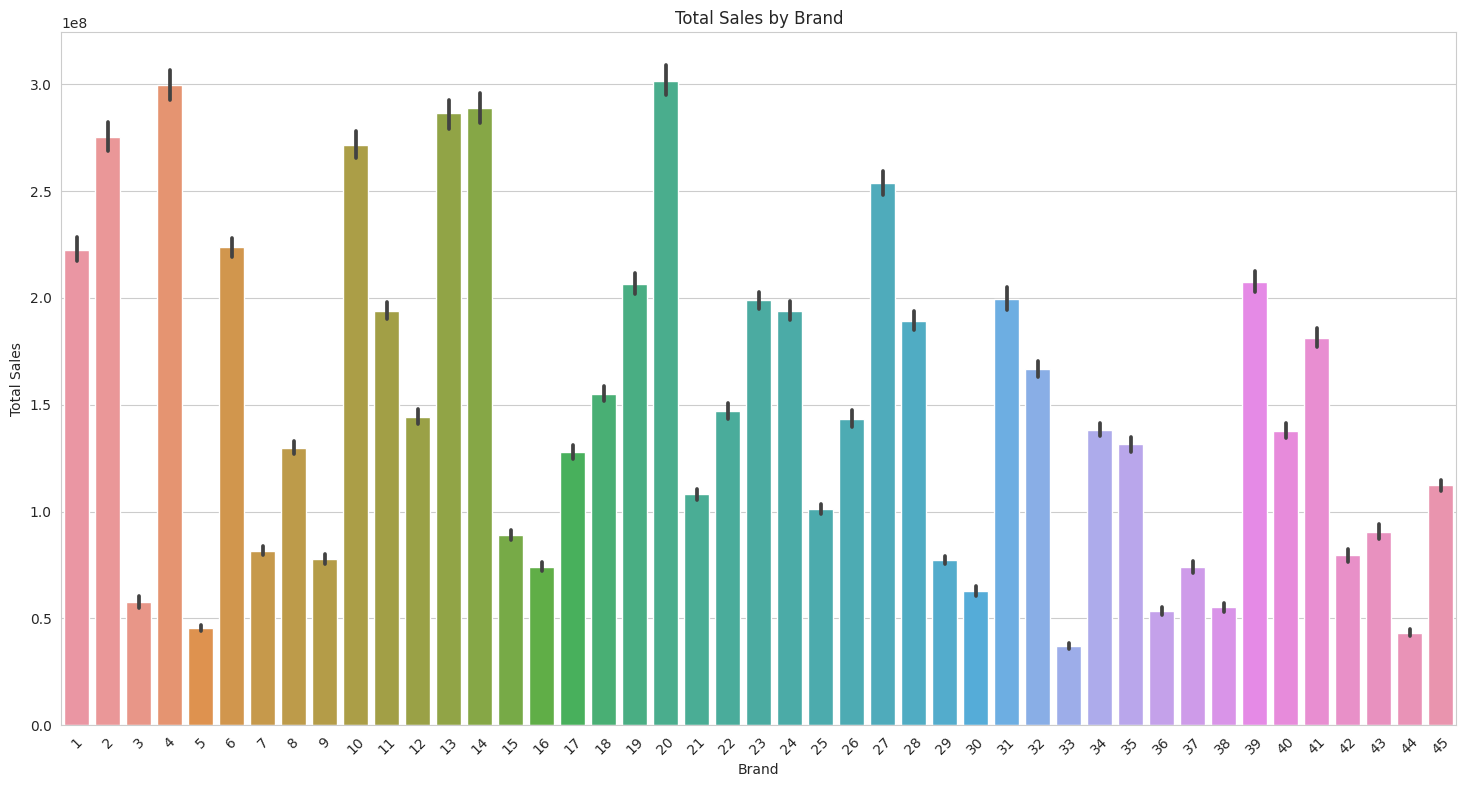

In [ ]:
# Create the bar chart using Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
sns.barplot(x='Store', y='Weekly_Sales', data=DF, estimator=sum)

# Set the plot title and axis labels
plt.title('Total Sales by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sales')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()



### **3- Determine the top ten selling stores**



In [ ]:
# Group the data by store and sum the weekly sales
sales_by_store = DF.groupby('Store')['Weekly_Sales'].sum()

# Sort the stores by sales in descending order and get the top ten
top_stores = sales_by_store.sort_values(ascending=False).head(10)

# Format values without scientific notation
#top_stores = top_stores.apply(lambda x: '{:.2f}'.format(x))

# Print the top ten stores and their sales
display(top_stores)

Store
20    3.014014e+08
4     2.995453e+08
14    2.890019e+08
13    2.865180e+08
2     2.753872e+08
10    2.716241e+08
27    2.538572e+08
6     2.237586e+08
1     2.224068e+08
39    2.074465e+08
Name: Weekly_Sales, dtype: float64



###**4- Histogram to show the top 10 stores sales**



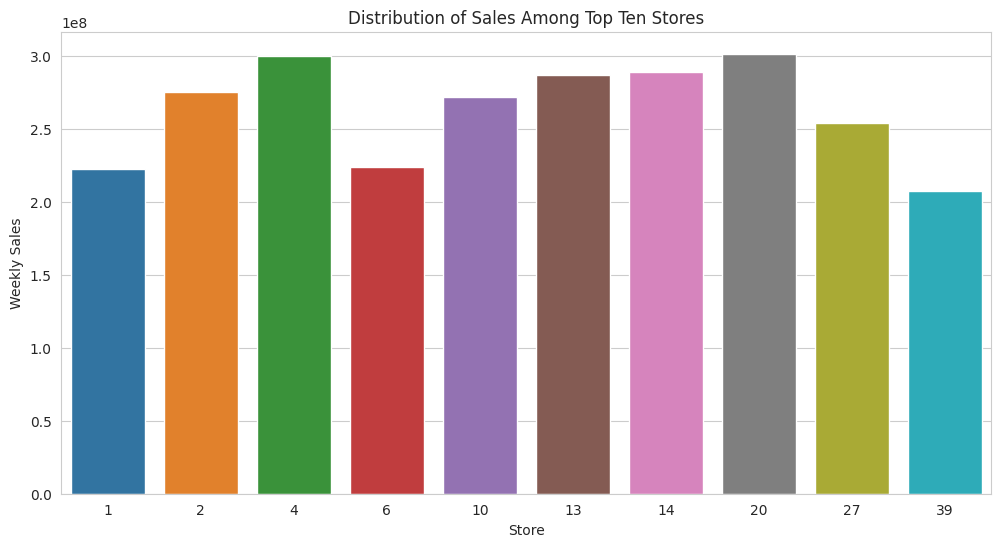

In [ ]:
# Create a horizontal histogram using Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x=top_stores.index, y=top_stores.values)

# Set the plot title and axis labels
plt.title('Distribution of Sales Among Top Ten Stores')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')


# Show the plot
plt.show()

Include only the top ten stores

In [ ]:
# Filter the original dataframe to include only the top ten stores
DF_top_stores = DF[DF['Store'].isin(top_stores.index)]



###**5- Average Sales Comparison during Holidays and Non-Holidays**



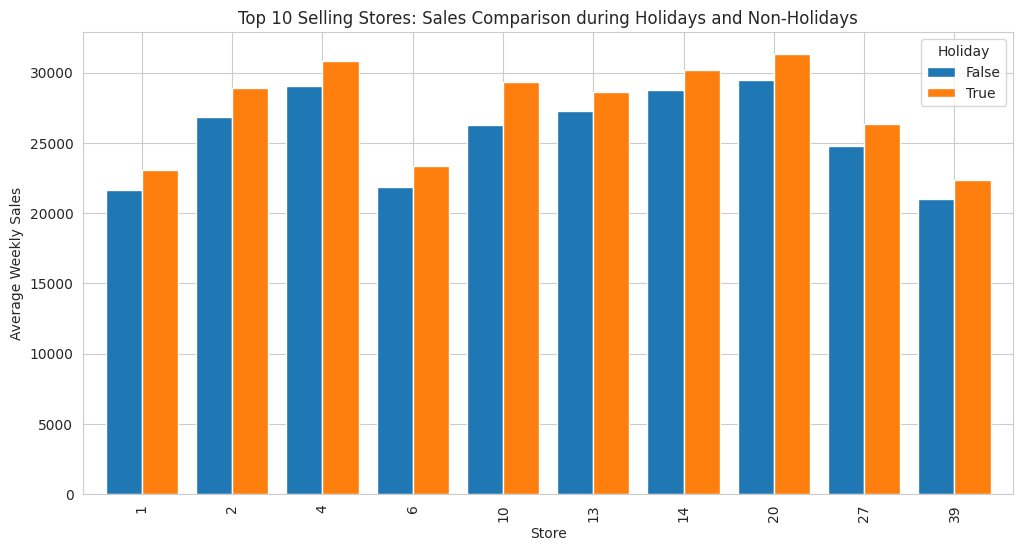

In [ ]:
# Group the data by store and holidays, and calculate the mean weekly sales
sales_by_store_holidays = DF_top_stores.groupby(['Store', 'Holiday'])['Weekly_Sales'].mean()

# Create a pivot table to compare average weekly sales during holidays and non-holidays
sales_pivot = sales_by_store_holidays.unstack()

# Create a bar chart to visualize the comparison
ax = sales_pivot.plot(kind='bar', figsize=(12, 6), width=0.8)
ax.set_xlabel('Store')
ax.set_ylabel('Average Weekly Sales')
ax.set_title('Top 10 Selling Stores: Sales Comparison during Holidays and Non-Holidays')
plt.show()



###**6- Average Sales for each department of top 10 Stores**



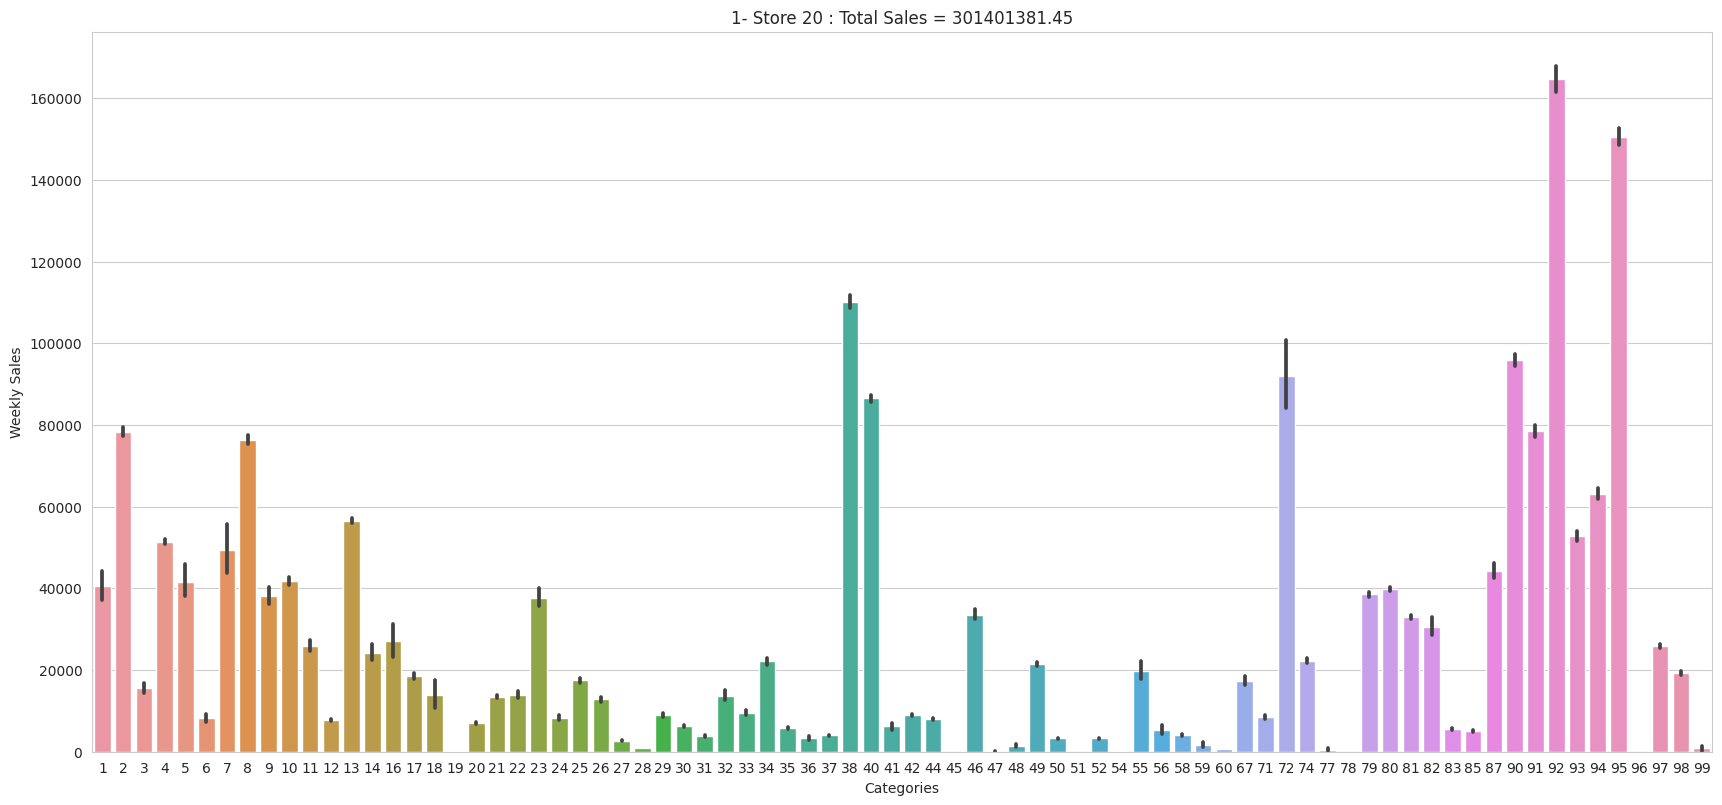

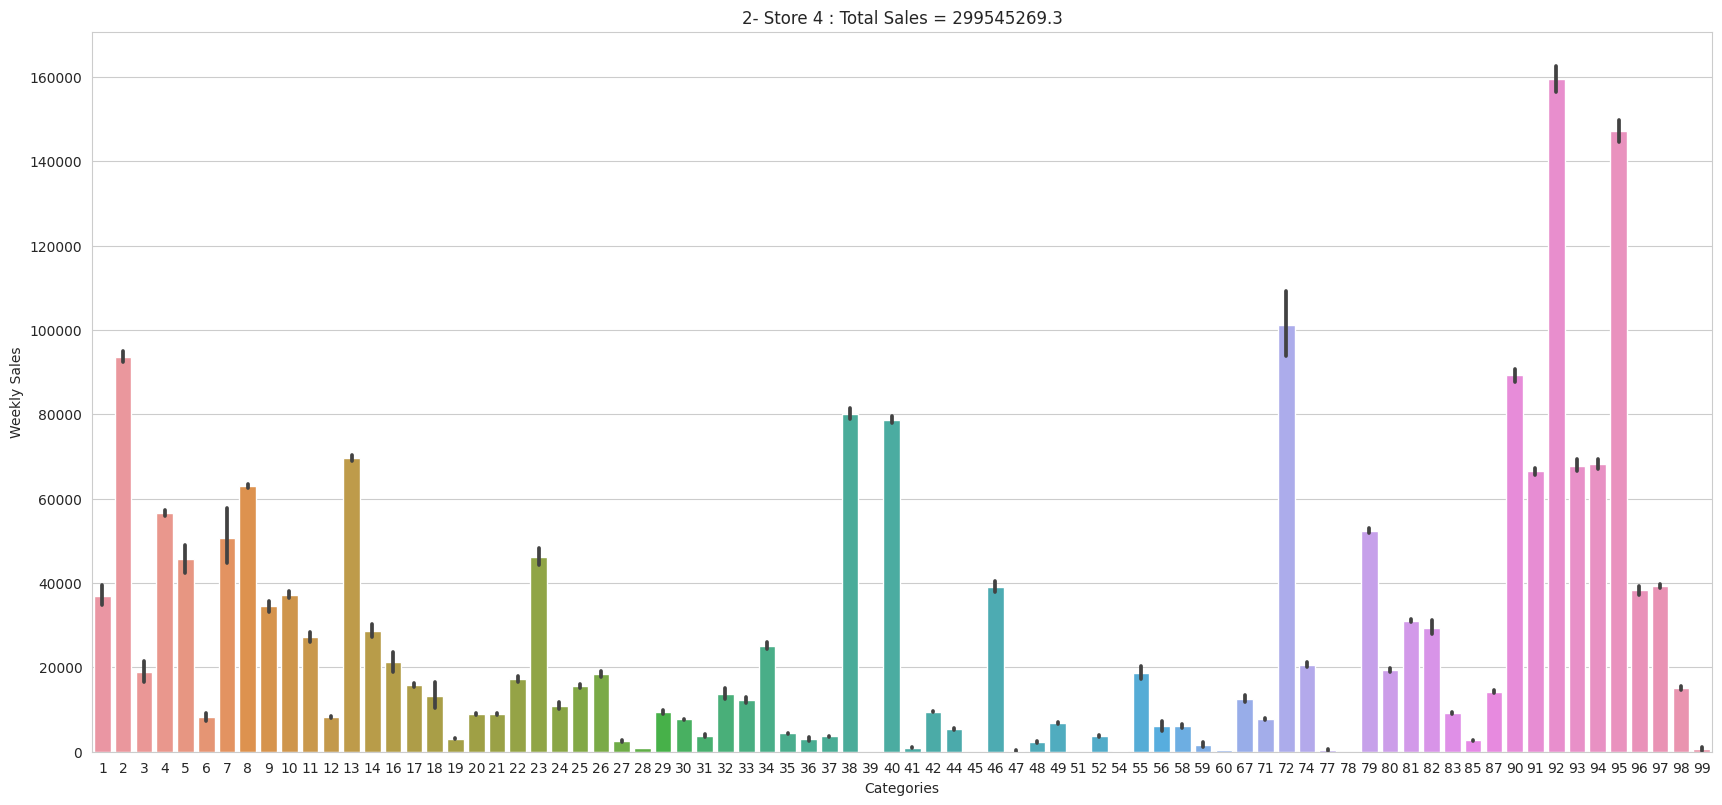

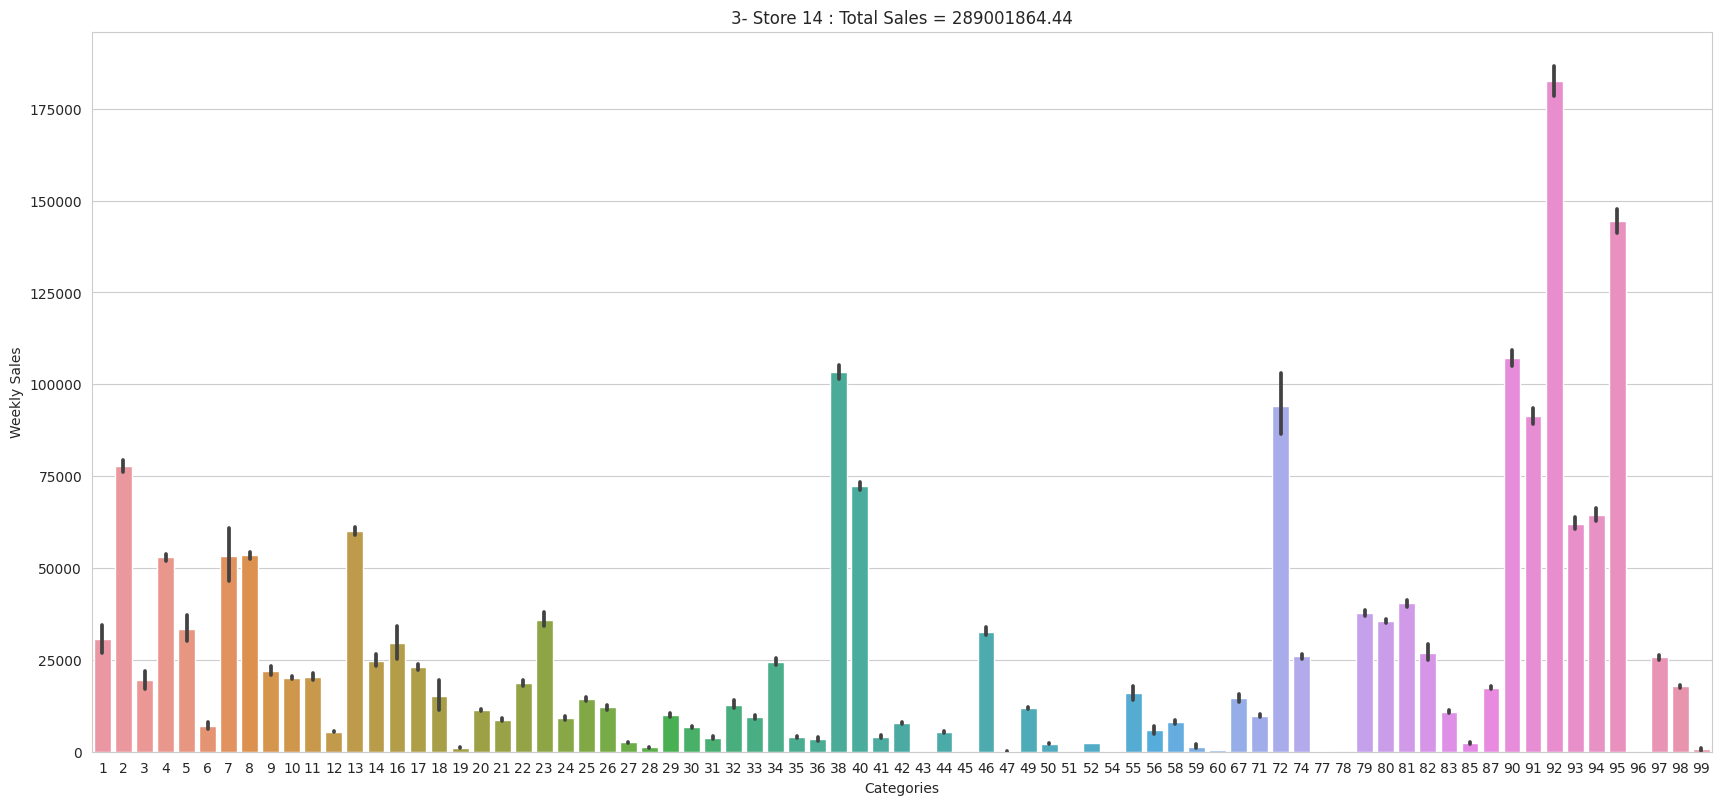

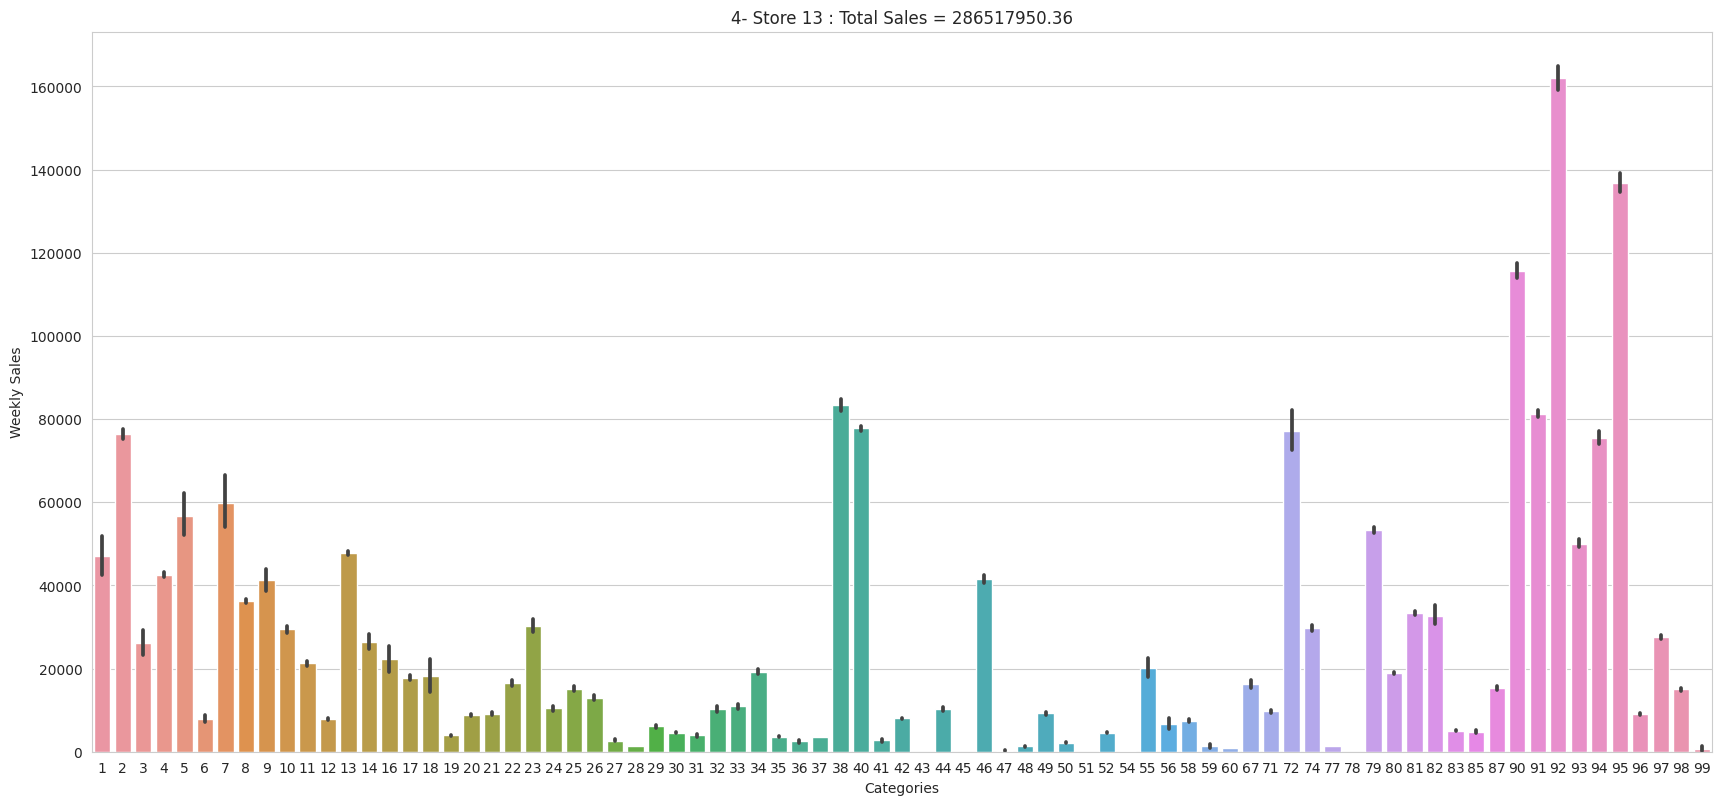

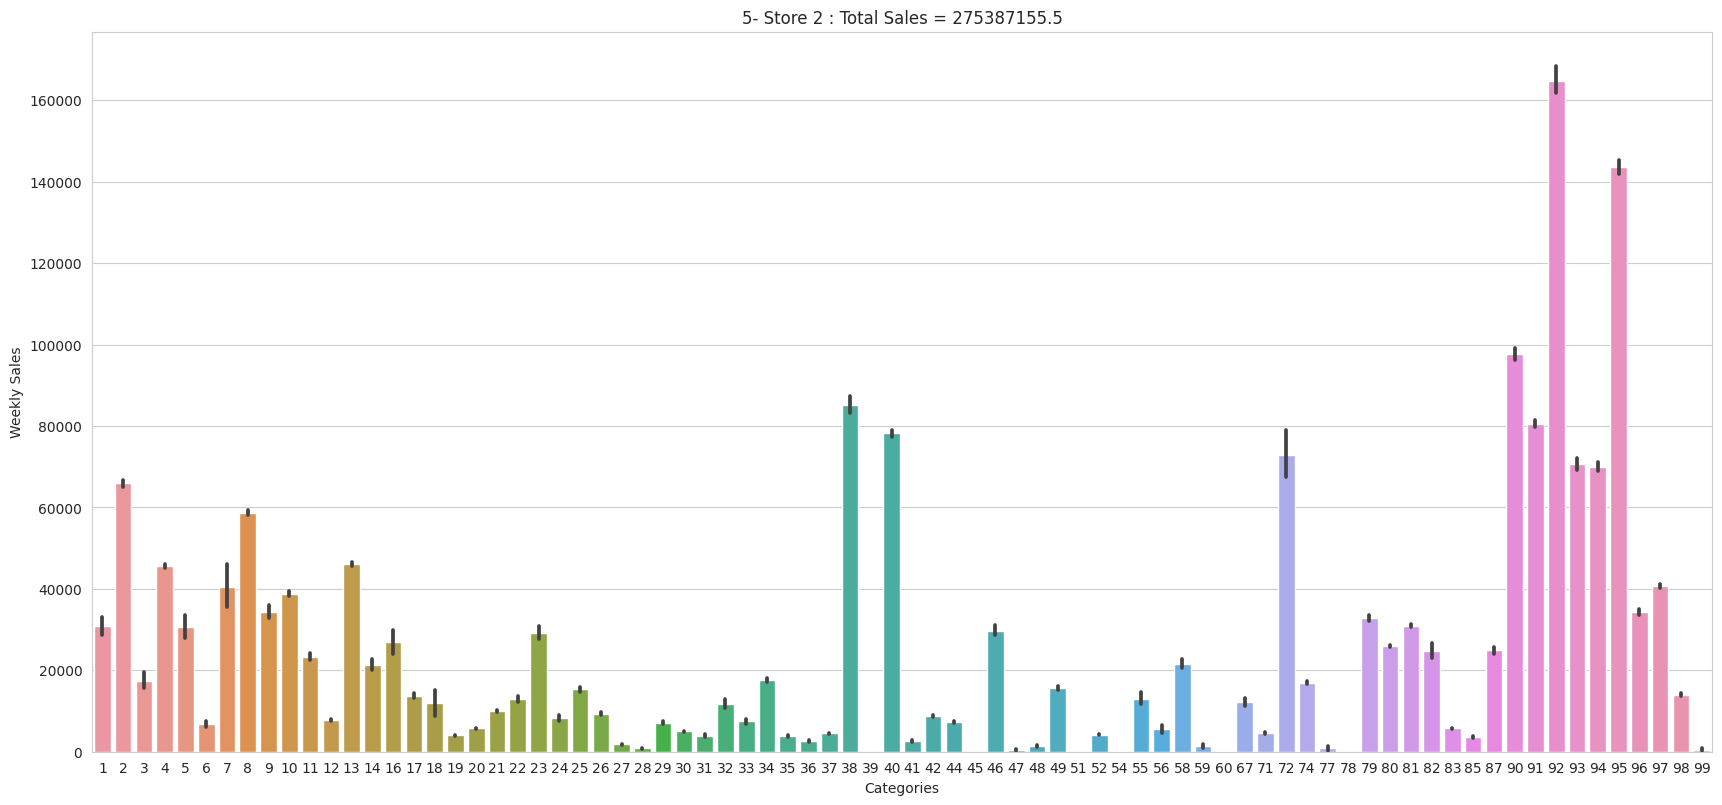

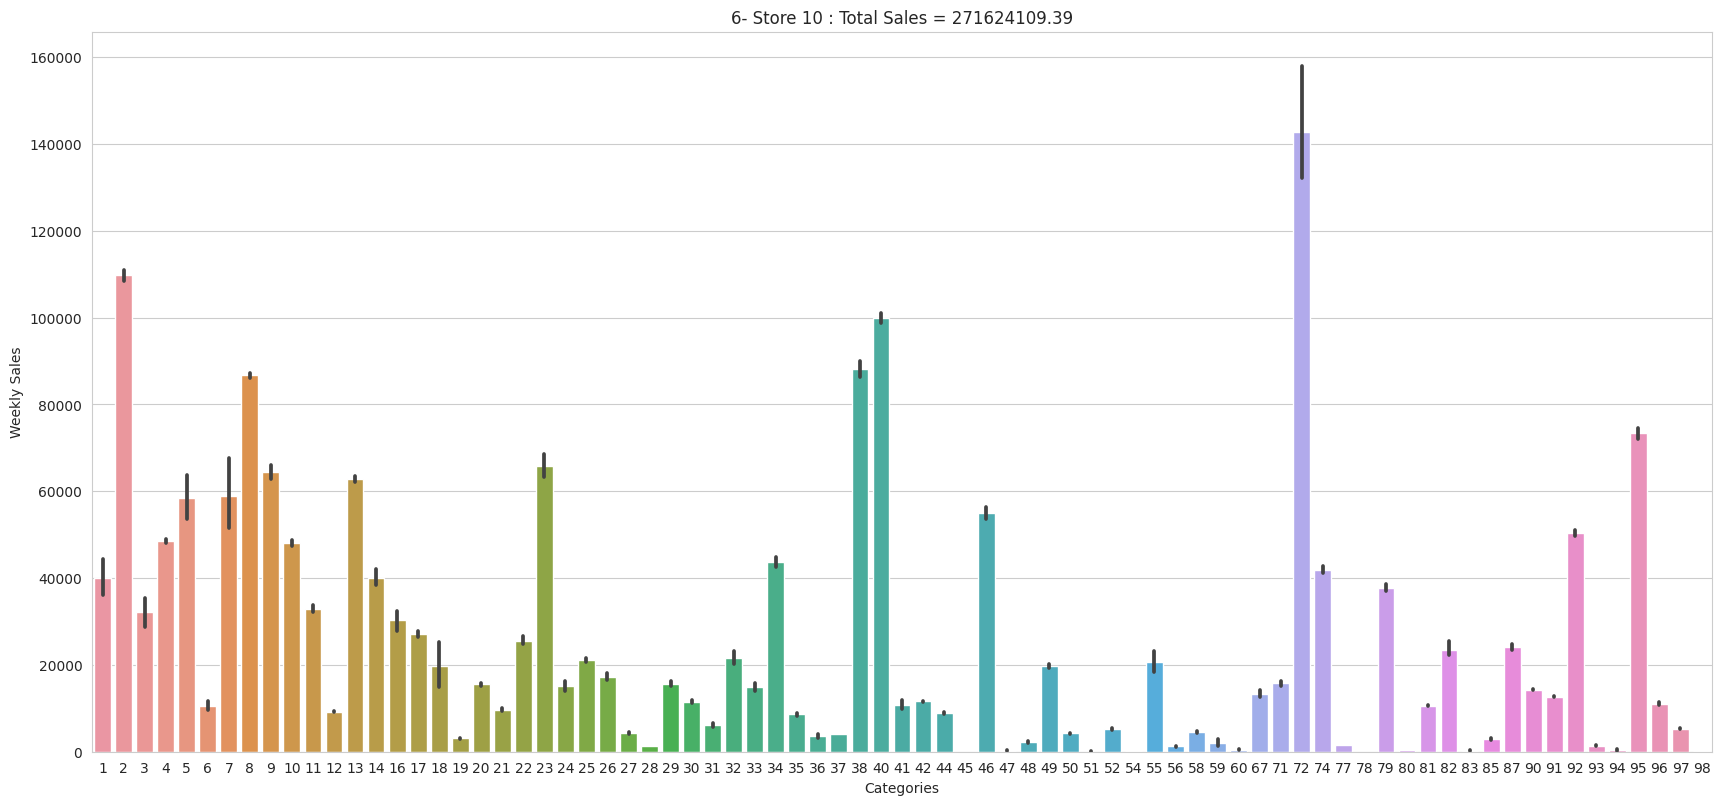

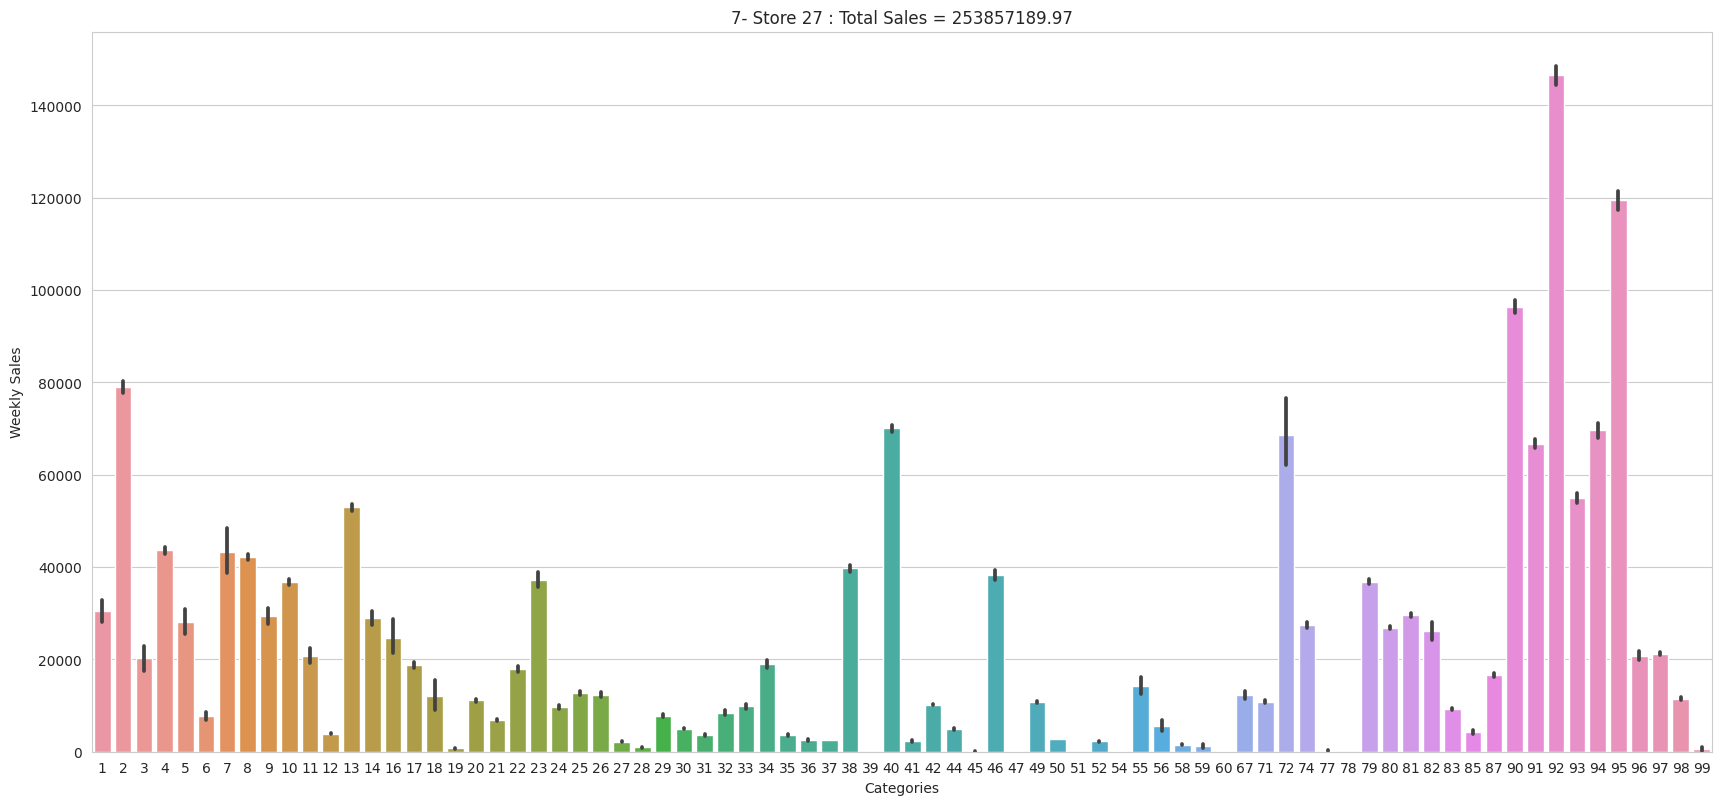

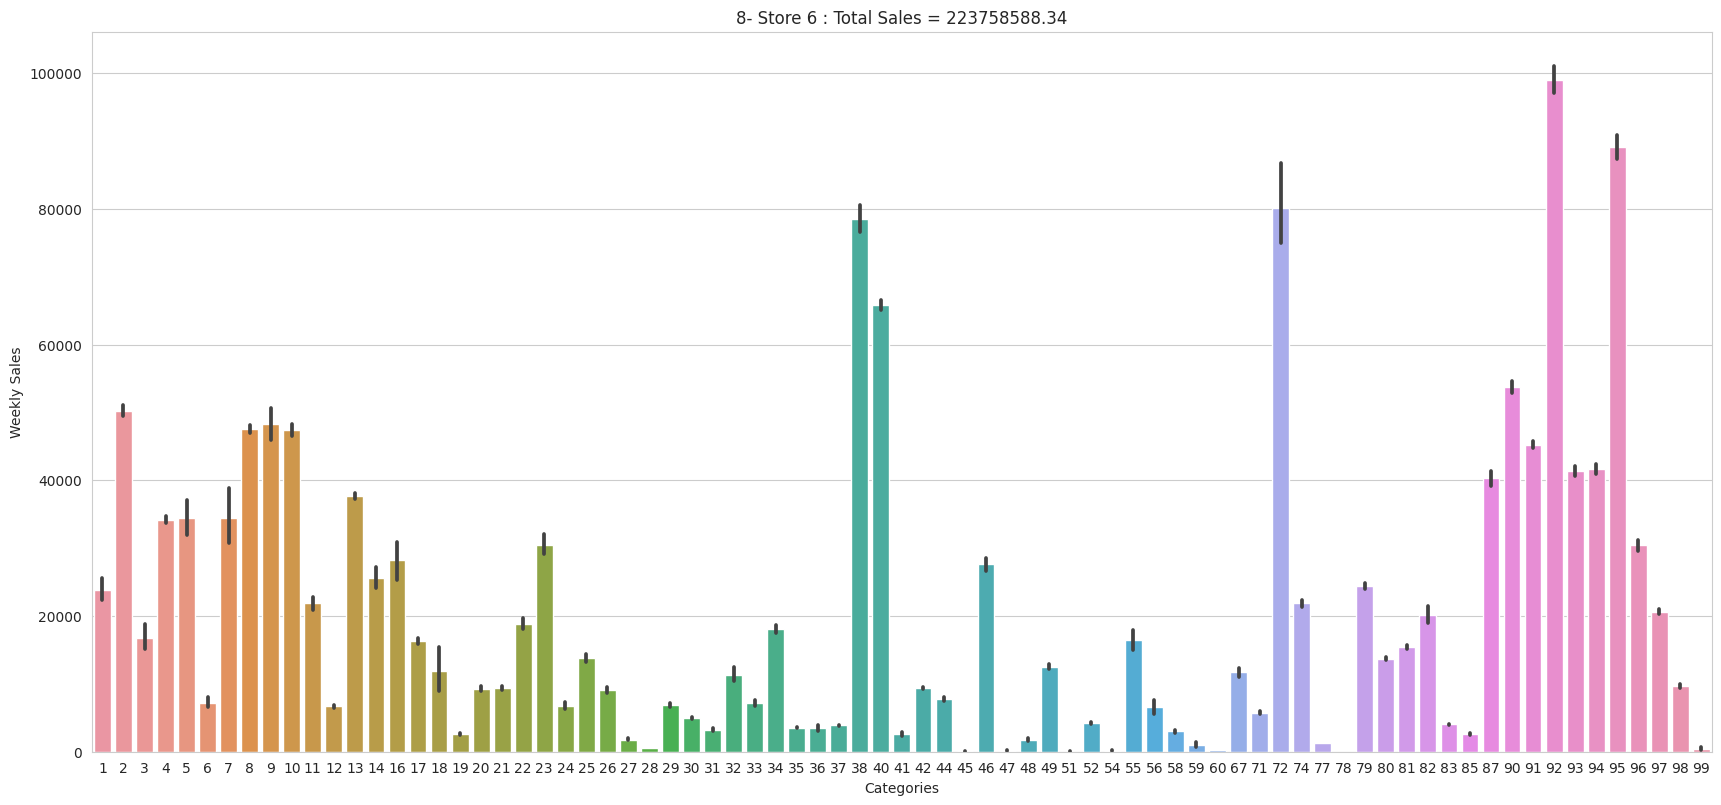

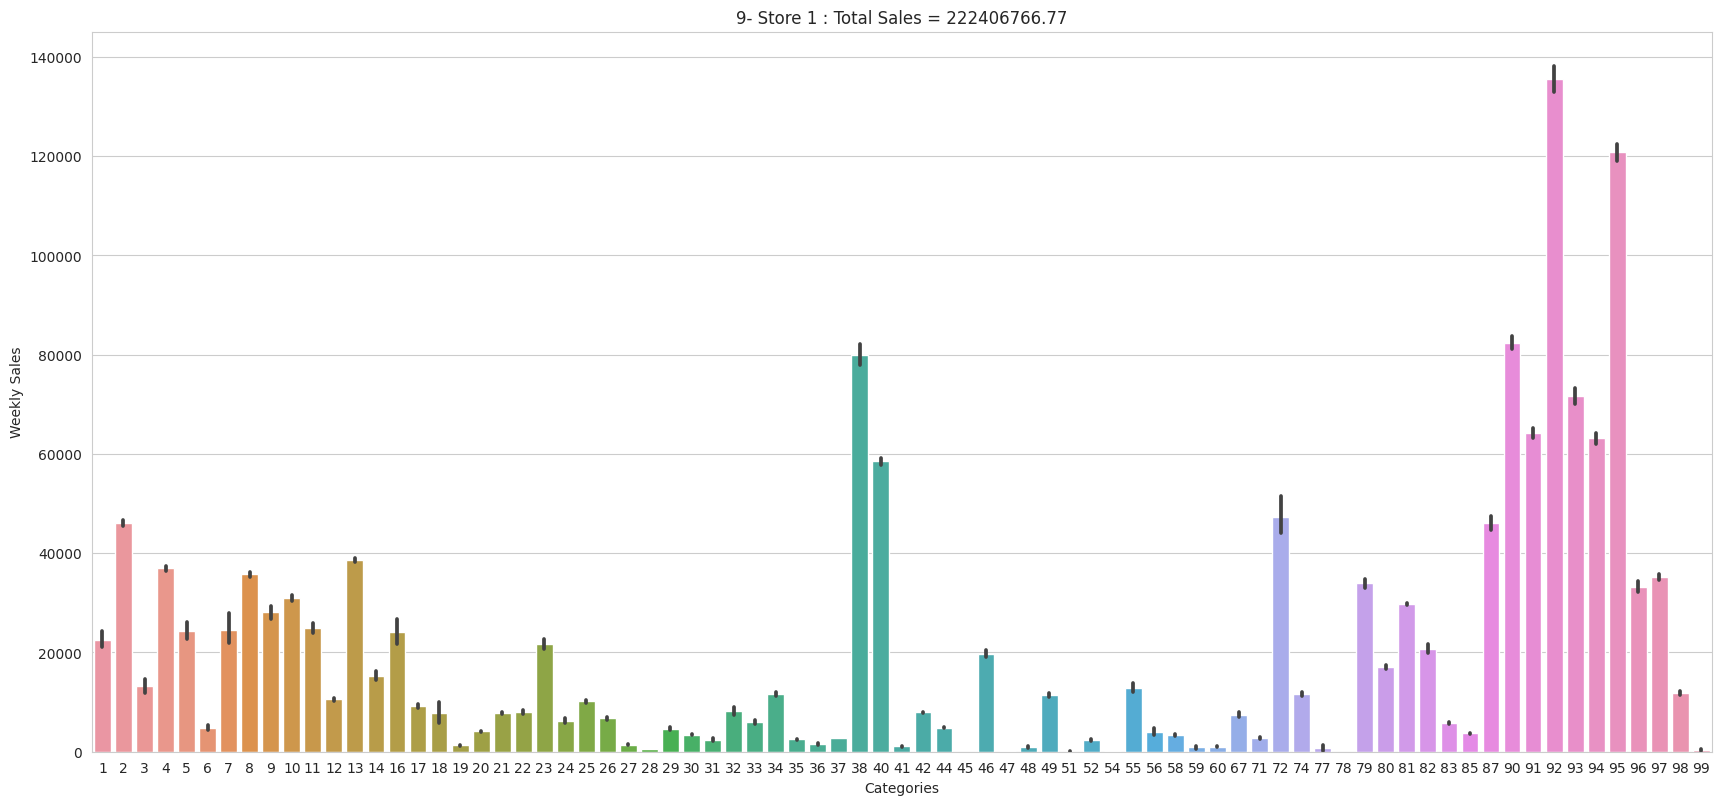

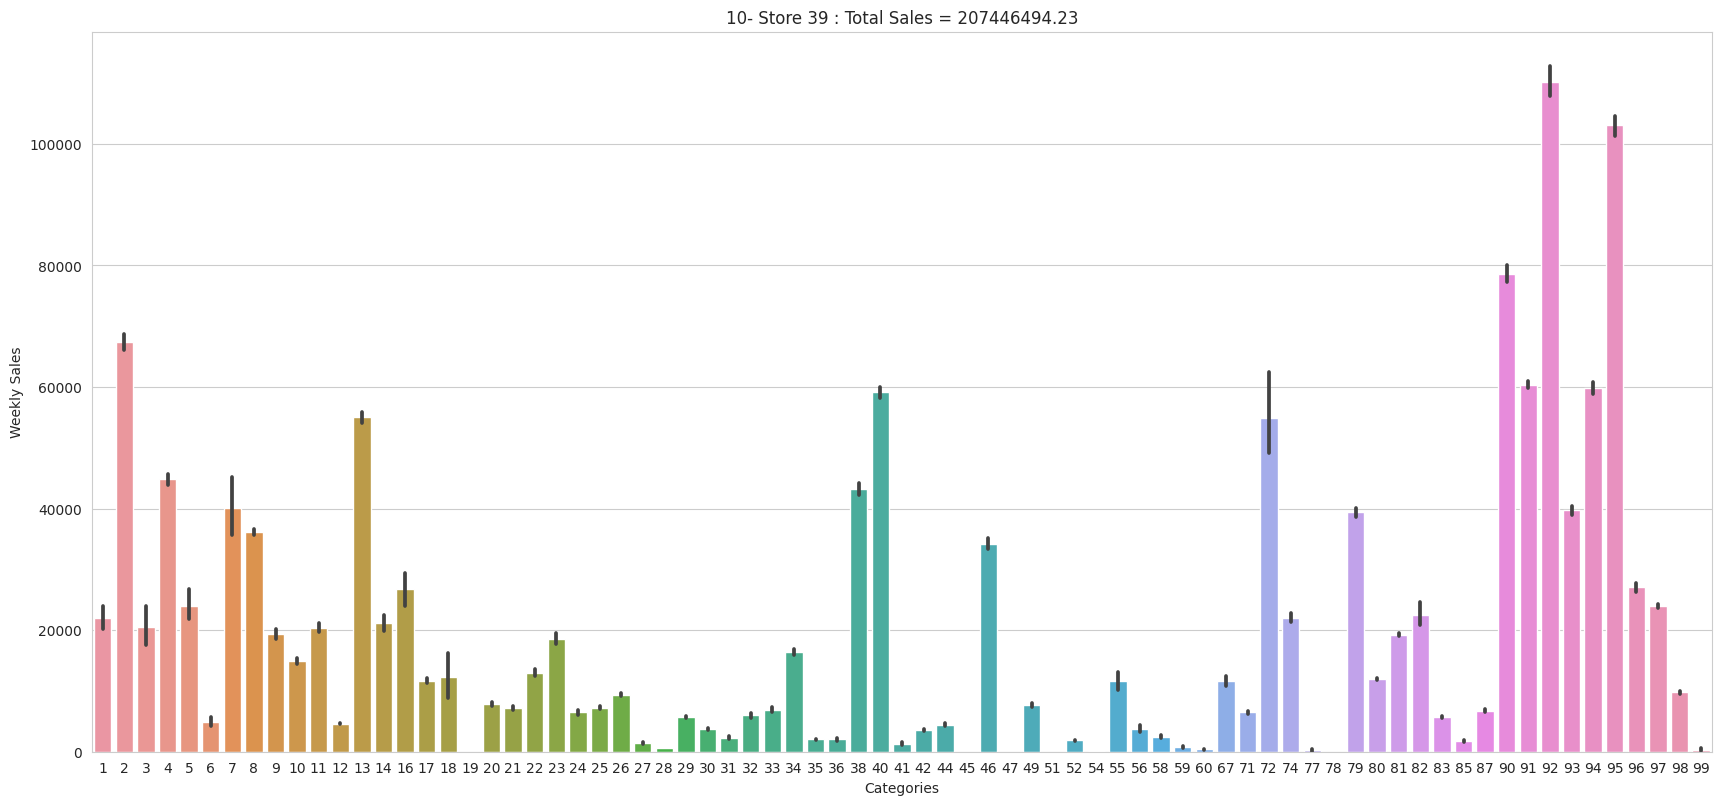

In [ ]:
i = 1
for store in top_stores.index:
  DF_store = DF_top_stores[DF_top_stores['Store'] == store]

  # Create a horizontal histogram using Seaborn
  sns.set_style('whitegrid')
  plt.figure(figsize=(18,9))
  sns.barplot(x='Category', y='Weekly_Sales', data=DF_store)

  # Set the plot title and axis labels
  plt.title('{}- Store {} : Total Sales = {}'.format(i, store, top_stores[store]))
  plt.xlabel('Categories')
  plt.ylabel('Weekly Sales')

  # Add margin between subplots
  plt.subplots_adjust(right=0.95, left=0.05, top=0.9, bottom=0.1, wspace=1)

  # Show the plot
  plt.show()

  i+=1


###**7- Relationship between Weekly Sales and Temperature**



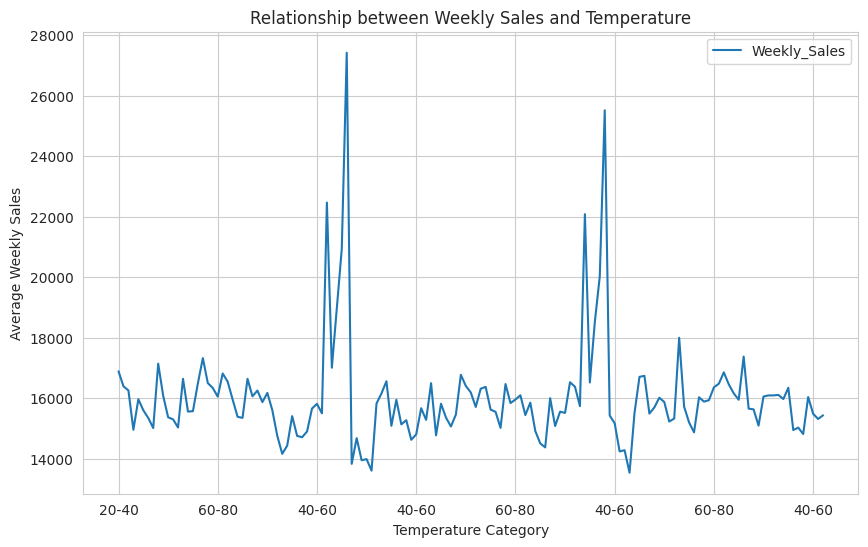

In [ ]:
# Group the data by week and calculate the mean weekly sales and temperature
weekly_sales_temp = DF.groupby('Date').agg({'Weekly_Sales': 'mean', 'Temperature': 'mean'})

# Create a new column 'Temp Category' to map temperature values to custom categories
bin_edges = [0, 20, 40, 60, 80, 100]
bin_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
weekly_sales_temp['Temp Category'] = pd.cut(weekly_sales_temp['Temperature'], bins=bin_edges, labels=bin_labels)

# Create a line chart to visualize the relationship between weekly sales and temperature
ax = weekly_sales_temp.plot(kind='line', x='Temp Category', y='Weekly_Sales', figsize=(10, 6))
ax.set_xlabel('Temperature Category')
ax.set_ylabel('Average Weekly Sales')
ax.set_title('Relationship between Weekly Sales and Temperature')
plt.show()



###**8- Relationship between Weekly Sales and Fuel**



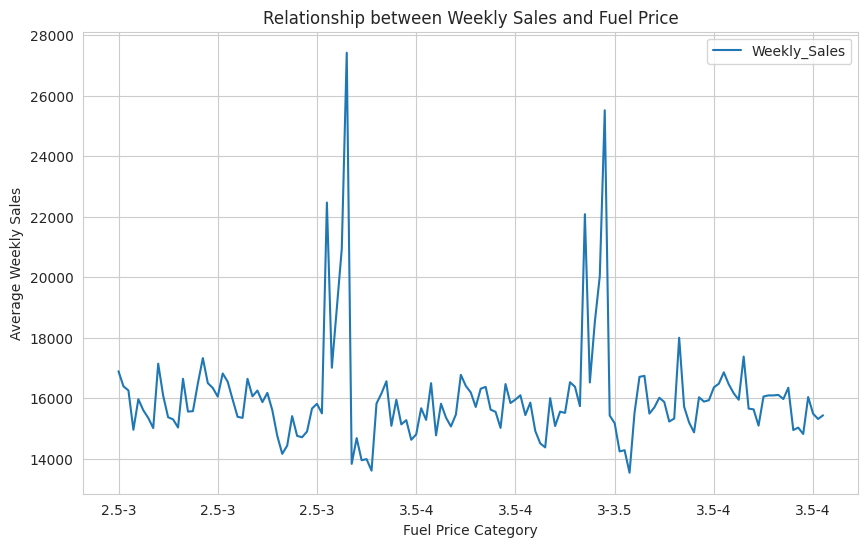

In [ ]:
# Group the data by week and calculate the mean weekly sales and fuel price
weekly_sales_fuel = DF.groupby('Date').agg({'Weekly_Sales': 'mean', 'Fuel_Price': 'mean'})

# Create a new column 'Fuel Category' to map fuel price values to custom categories
bin_edges = [0, 2, 2.5, 3, 3.5, 4]
bin_labels = ['0-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4']
weekly_sales_fuel['Fuel Category'] = pd.cut(weekly_sales_fuel['Fuel_Price'], bins=bin_edges, labels=bin_labels)

# Create a line chart to visualize the relationship between fuel price and weekly sales
ax = weekly_sales_fuel.plot(kind='line', x='Fuel Category', y='Weekly_Sales', figsize=(10, 6))
ax.set_xlabel('Fuel Price Category')
ax.set_ylabel('Average Weekly Sales')
ax.set_title('Relationship between Weekly Sales and Fuel Price')
plt.show()

# **Data Modelling**

###Preprocessing Data

In [ ]:
#Spleting Data to X , y
x=DF.drop(columns=['Weekly_Sales','Date'])
y=DF['Weekly_Sales']
x

,Store,Category,Holiday,Fuel_Price,Temperature
1,1,1,False,2.572,42.31
2,1,1,True,2.548,38.51
3,1,1,False,2.514,39.93
4,1,1,False,2.561,46.63
5,1,1,False,2.625,46.50
...,...,...,...,...,...
420208,45,98,False,3.997,64.88
420209,45,98,False,3.985,64.89
420210,45,98,False,4.000,54.47
420211,45,98,False,3.969,56.47


In [ ]:
lb=preprocessing.LabelEncoder()
x.Holiday=lb.fit_transform(x.Holiday)
x

,Store,Category,Holiday,Fuel_Price,Temperature
1,1,1,0,2.572,42.31
2,1,1,1,2.548,38.51
3,1,1,0,2.514,39.93
4,1,1,0,2.561,46.63
5,1,1,0,2.625,46.50
...,...,...,...,...,...
420208,45,98,0,3.997,64.88
420209,45,98,0,3.985,64.89
420210,45,98,0,4.000,54.47
420211,45,98,0,3.969,56.47


In [ ]:
x.shape

(420212, 5)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### **Random Forest Regression**

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

RandomForestRegressor()

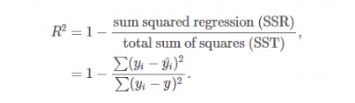![image.png]()

In [ ]:
rf_prediction= rf_regressor.predict(x_test)
rf_score = r2_score(y_test, rf_prediction)

# Calculate the R-squared error

r2 = r2_score(y_test, rf_prediction)

# summation deiff of y_train and y_test actual data and preicted ==> 1-summation of y_train and y_tes /
print(f"Random Forest Regression rf_score: {r2*100}%")

Random Forest Regression rf_score: 92.80907554473417%


### **Decision Tree Regression**

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=300)
dt_model.fit(x_train, y_train)
# Evaluate the model
dt_predictions = dt_model.predict(x_test)
r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree Regression r2_score: {r2*100} %")

Decision Tree Regression r2_score: 87.76777236999702 %
